In [394]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import io
import PIL
from collections import Counter

In [395]:
file_paths=['/Users/admin/Documents/Summer Research/GeoData/geo_2020-02-28.json.mx', #0
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-02-29.json.mx', #1
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-01.json.mx', #3
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-02.json.mx', #4 
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-03.json.mx', #5
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-04.json.mx', #6
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-05.json.mx', #7
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-06.json.mx', #8
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-07.json.mx', #9
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-08.json.mx', #10
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-09.json.mx', #11
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-10.json.mx', #12
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-11.json.mx',#13
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-12.json.mx',#14
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-13.json.mx',#15
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-14.json.mx',#16
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-15.json.mx',#17
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-16.json.mx',#18
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-17.json.mx',#19
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-18.json.mx',#20
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-19.json.mx',#21
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-20.json.mx',#22
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-21.json.mx',#23
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-22.json.mx',#24
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-23.json.mx',#25
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-24.json.mx',#26
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-25.json.mx',#27
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-26.json.mx',#28
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-27.json.mx',#29
          '/Users/admin/Documents/Summer Research/GeoData/geo_2020-03-28.json.mx'#30
          
          
    
]

In [396]:
mexico_map=states = gpd.read_file(r'/Users/admin/Documents/Summer Research/Maps/mexico_states/destdv250k_2gw.shp')

In [397]:
def getDistribution(data_path):
    df=pd.read_json(data_path, lines=True) # loads data from json file
    
    states=[] #to store the name of the mexican states
    for i in range(len(df.index)):
        
        for j in range(len(df['tweet_locations'][i])):
            
            if(df['tweet_locations'][i][j]['country_code']=='mx' and 'state' in df['tweet_locations'][i][j]):
                
                states.append(df['tweet_locations'][i][j]['state'])
    
    state_counts = Counter(states)
    df2 = pd.DataFrame.from_dict(state_counts, orient='index',columns=['number of tweets'])
    
    df2.reset_index(drop=False, inplace=False)
  
    
    return df2
    


    

In [398]:
def normalize(df): #removes accents, corrects states names and capitalize state names
    #returns corrected data frame
    
    df2=df.reset_index(inplace=False,drop=False)
    df2=df2.rename(columns={'index':'states'}, inplace=False)
    for i in range(len(df.index)):
        if(df2['states'][i]=='Mexico City'):
            df2['states'][i]='Distrito Federal'
        
        if(df2['states'][i]=='South Lower California'):
            df2['states'][i]='Baja California Sur'
            
    df2['states']=df2['states'].str.upper()
    df2['states']=df2['states'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    return df2

In [399]:
def plotBarChart(df):
    df.plot(kind='bar')
    

In [400]:
def sorting_dataframe(df1,df2): #sorts dataframe df1 based on df2
    
    df = df1.set_index('states')   
    df = df.reindex(index=df2['states'])
    df = df.reset_index()
    
    return df

In [401]:
distribution_list=[ getDistribution(file_paths[i]) for i in range(len(file_paths))]


In [402]:
normalized_list=[normalize(distribution_list[i]) for i in range(len(distribution_list))]

<ipython-input-398-b37f656aa3b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['states'][i]='Distrito Federal'
<ipython-input-398-b37f656aa3b6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['states'][i]='Baja California Sur'


In [403]:
sorted_dataframes=[sorting_dataframe(df,df1) for df in normalized_list]


In [404]:
state_asindex=[df.set_index('states') for df in sorted_dataframes]


In [405]:

merge=pd.concat(state_asindex, axis=1)


In [406]:
merge.head(32)

,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,...,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets,number of tweets
states,,,,,,,,,,,,,,,,,,,,,
OAXACA,2370,2883,2182,2497,2057,2856,2831,3168,6966,3235,...,4754,2945,3975,2737,3904,4080,3782,5065,4876,5940
NAYARIT,3051,3014,13522,17332,14933,11916,6341,9222,10073,20399,...,11638,5247,12639,9107,4035,6746,6635,13384,13801,7458
SINALOA,17474,27856,14101,7508,9348,42874,8277,10388,9062,8556,...,7585,4309,6367,9024,11864,11819,8648,9085,8302,7703
SONORA,26520,24238,20244,18261,23494,34026,52709,30742,35065,37477,...,37998,21508,37225,24001,40212,55365,46884,44645,43434,39938
CHIHUAHUA,39672,33822,18043,19465,23095,36964,17949,17782,18663,48580,...,35277,23212,35963,29696,43546,51051,47411,57219,54710,43661
COAHUILA,3584,7772,4832,2400,1954,1703,1604,1438,1585,1283,...,3449,2241,3969,5185,3040,4532,3800,5187,8194,7236
QUERETARO,27001,28954,33235,52241,70186,28465,27906,27074,24766,26537,...,25879,14735,21320,20087,28045,32400,22666,21560,21212,25320
GUANAJUATO,1522,1240,818,890,703,1064,1162,561,659,1763,...,2188,2220,1710,1692,1707,2445,2492,1488,1743,1460
VERACRUZ,33317,17968,17254,17391,16594,30983,20184,20599,27348,25589,...,24827,19445,34300,20752,25492,37682,31995,31681,26998,29599


In [407]:
#sorting_dataframe(df1,df2): #sorts dataframe df1 based on df2
    

In [411]:
print(merge.columns)

Index(['number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets',
       'number of tweets', 'number of tweets', 'number of tweets'],
      dtype='object')


In [447]:
merge.to_csv('geo_twitter_data.csv')

In [457]:
data = pd.read_csv('geo_data.csv')

In [458]:
data.head(32)

,states,number of tweets,number of tweets.1,number of tweets.2,number of tweets.3,number of tweets.4,number of tweets.5,number of tweets.6,number of tweets.7,number of tweets.8,...,number of tweets.20,number of tweets.21,number of tweets.22,number of tweets.23,number of tweets.24,number of tweets.25,number of tweets.26,number of tweets.27,number of tweets.28,number of tweets.29
0,OAXACA,2370,2883,2182,2497,2057,2856,2831,3168,6966,...,4754,2945,3975,2737,3904,4080,3782,5065,4876,5940
1,NAYARIT,3051,3014,13522,17332,14933,11916,6341,9222,10073,...,11638,5247,12639,9107,4035,6746,6635,13384,13801,7458
2,SINALOA,17474,27856,14101,7508,9348,42874,8277,10388,9062,...,7585,4309,6367,9024,11864,11819,8648,9085,8302,7703
3,SONORA,26520,24238,20244,18261,23494,34026,52709,30742,35065,...,37998,21508,37225,24001,40212,55365,46884,44645,43434,39938
4,CHIHUAHUA,39672,33822,18043,19465,23095,36964,17949,17782,18663,...,35277,23212,35963,29696,43546,51051,47411,57219,54710,43661
5,COAHUILA DE ZARAGOZA,3584,7772,4832,2400,1954,1703,1604,1438,1585,...,3449,2241,3969,5185,3040,4532,3800,5187,8194,7236
6,QUERETARO DE ARTEAGA,27001,28954,33235,52241,70186,28465,27906,27074,24766,...,25879,14735,21320,20087,28045,32400,22666,21560,21212,25320
7,GUANAJUATO,1522,1240,818,890,703,1064,1162,561,659,...,2188,2220,1710,1692,1707,2445,2492,1488,1743,1460
8,VERACRUZ DE IGNACIO DE LA LLAVE,33317,17968,17254,17391,16594,30983,20184,20599,27348,...,24827,19445,34300,20752,25492,37682,31995,31681,26998,29599
9,TAMAULIPAS,8091,5790,6729,5572,11491,9039,4142,4225,6411,...,10145,6750,9809,9018,11800,19595,17513,16974,15878,20936


In [459]:
states = gpd.read_file(r'/Users/admin/Documents/Summer Research/Maps/mexico_states/destdv250k_2gw.shp')

In [460]:
states=states[['ENTIDAD','geometry']]

In [461]:
data=data.groupby('states').sum()

In [462]:
#mergin shp file and data

final_map = states.join(data,on='ENTIDAD',how='right')
final_map.head()

,ENTIDAD,geometry,number of tweets,number of tweets.1,number of tweets.2,number of tweets.3,number of tweets.4,number of tweets.5,number of tweets.6,number of tweets.7,...,number of tweets.20,number of tweets.21,number of tweets.22,number of tweets.23,number of tweets.24,number of tweets.25,number of tweets.26,number of tweets.27,number of tweets.28,number of tweets.29
800,AGUASCALIENTES,"POLYGON ((-101.99762 22.12292, -101.99752 22.1...",6156,4552,1926,2431,2822,2053,1542,2378,...,5908,2400,3115,5463,3468,10616,7538,3583,3272,4389
0,BAJA CALIFORNIA,"POLYGON ((-116.15195 32.61459, -116.13523 32.6...",10727,10081,10851,9061,12176,24448,8406,11219,...,10229,6157,17341,12426,13585,24850,21469,21205,17903,20491
2,BAJA CALIFORNIA,"POLYGON ((-117.29441 32.43412, -117.29514 32.4...",10727,10081,10851,9061,12176,24448,8406,11219,...,10229,6157,17341,12426,13585,24850,21469,21205,17903,20491
3,BAJA CALIFORNIA,"POLYGON ((-117.26293 32.42339, -117.26320 32.4...",10727,10081,10851,9061,12176,24448,8406,11219,...,10229,6157,17341,12426,13585,24850,21469,21205,17903,20491
4,BAJA CALIFORNIA,"POLYGON ((-117.25951 32.41480, -117.25991 32.4...",10727,10081,10851,9061,12176,24448,8406,11219,...,10229,6157,17341,12426,13585,24850,21469,21205,17903,20491


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


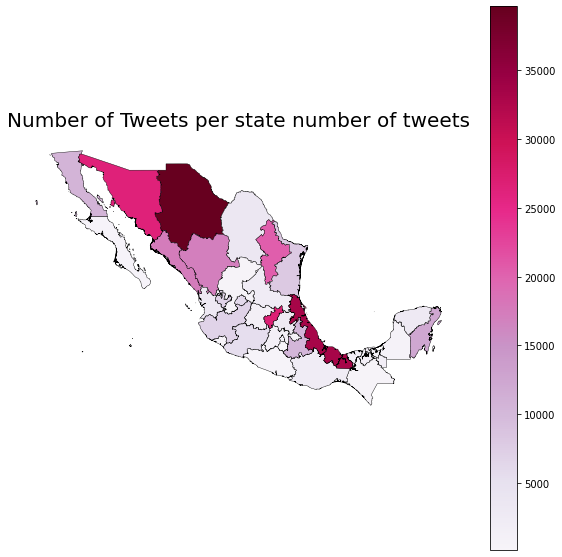

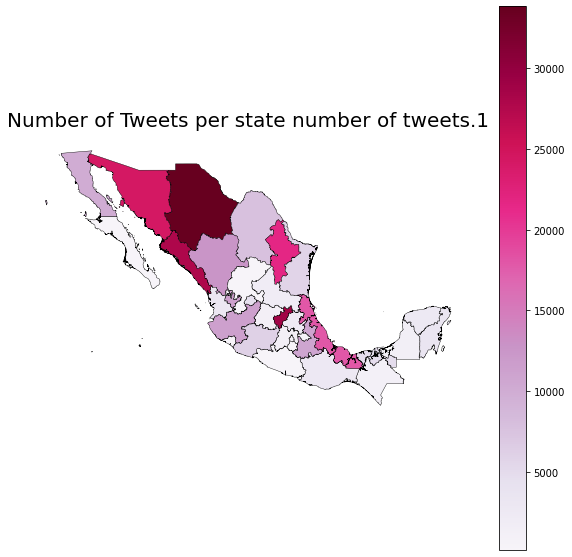

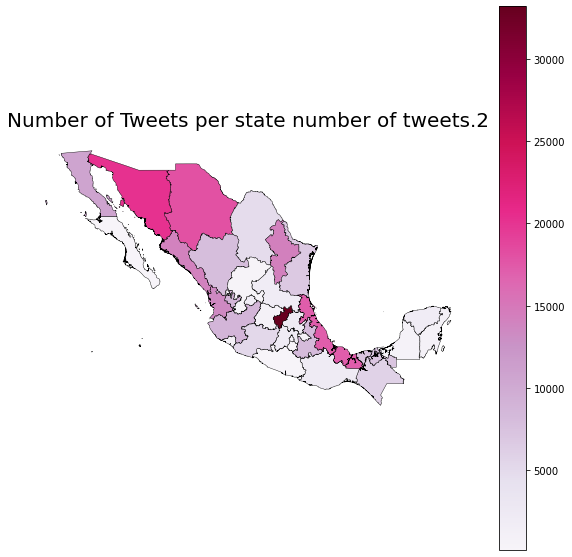

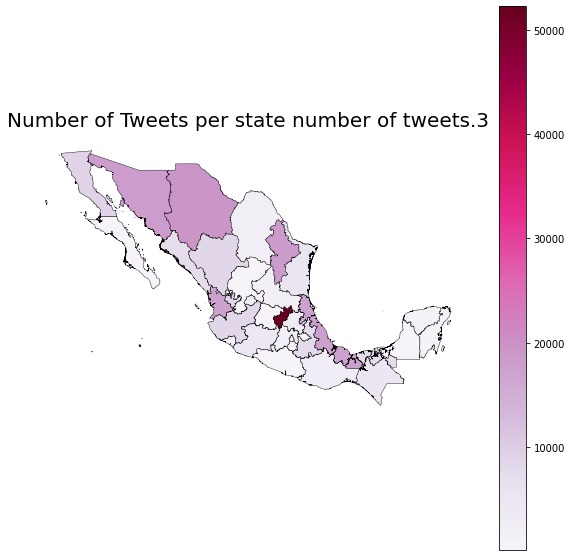

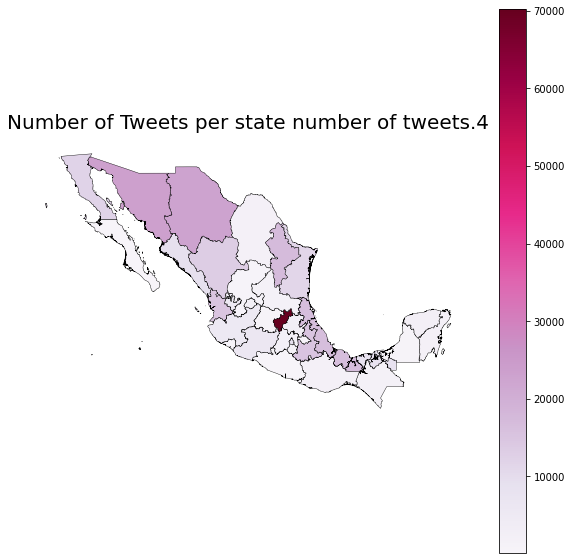

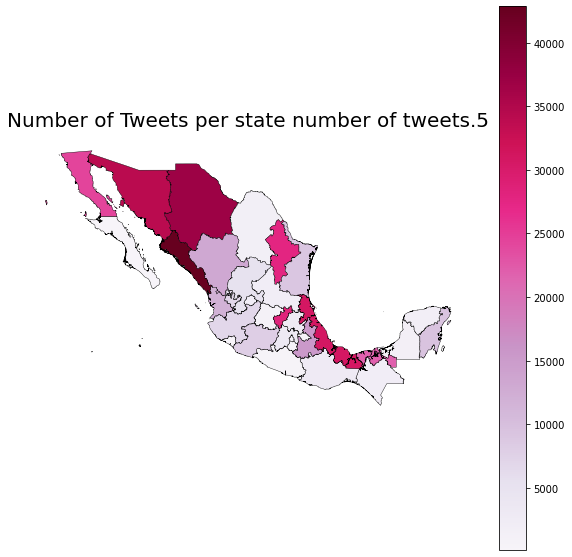

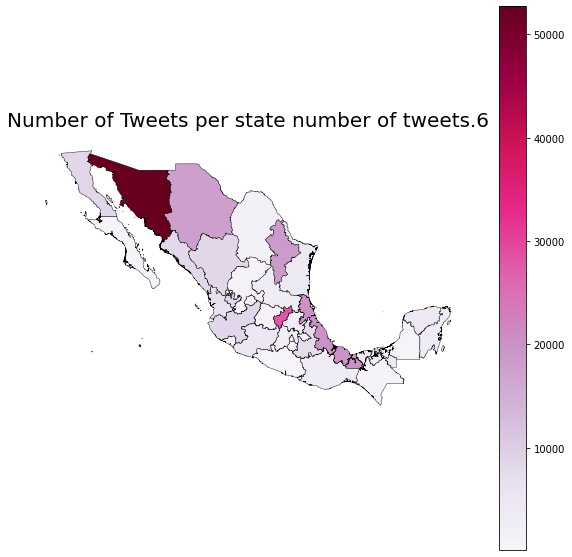

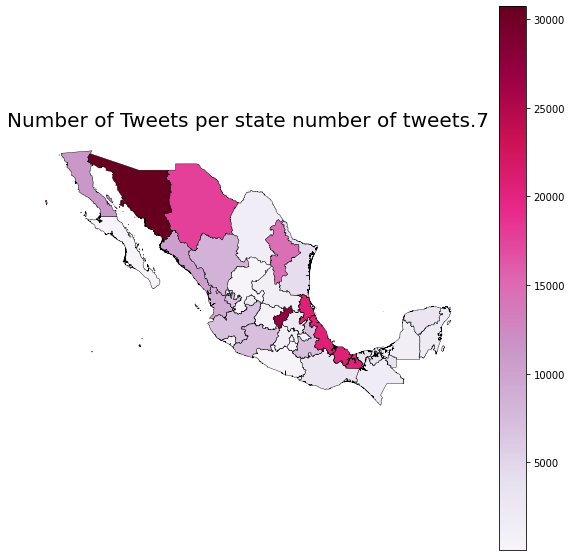

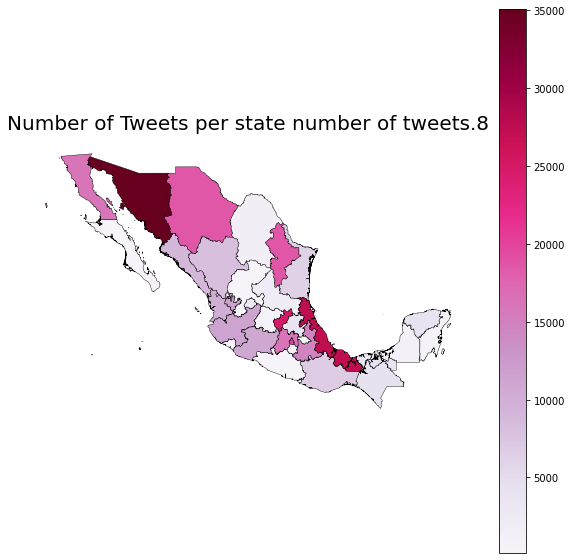

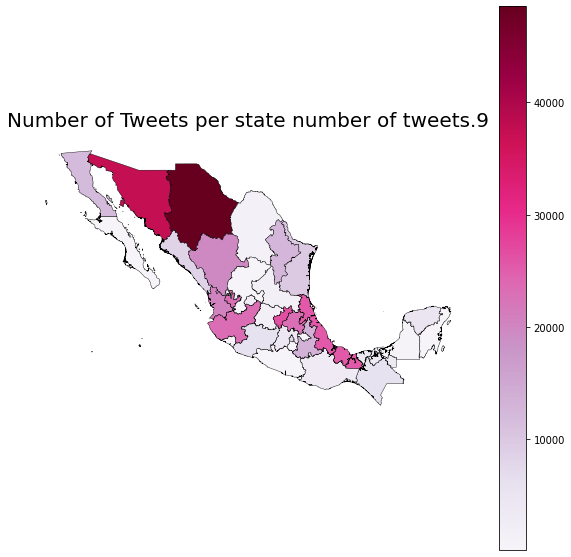

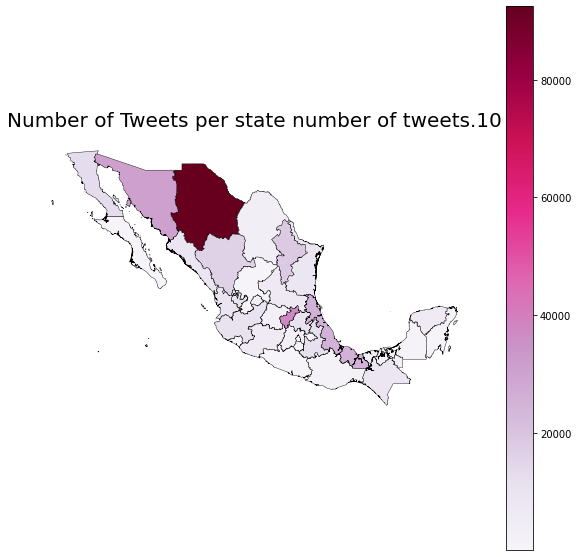

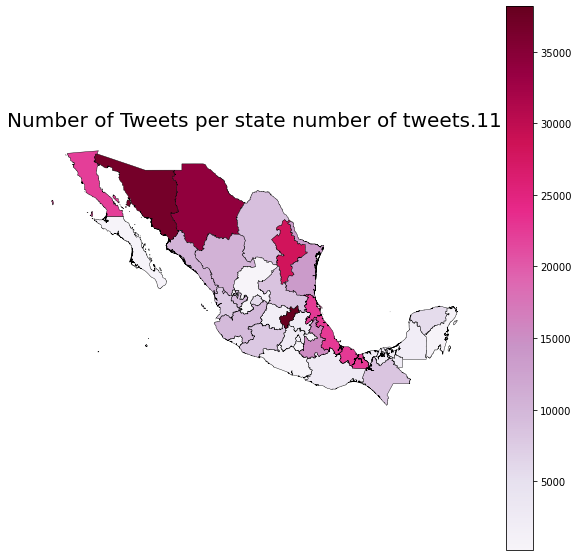

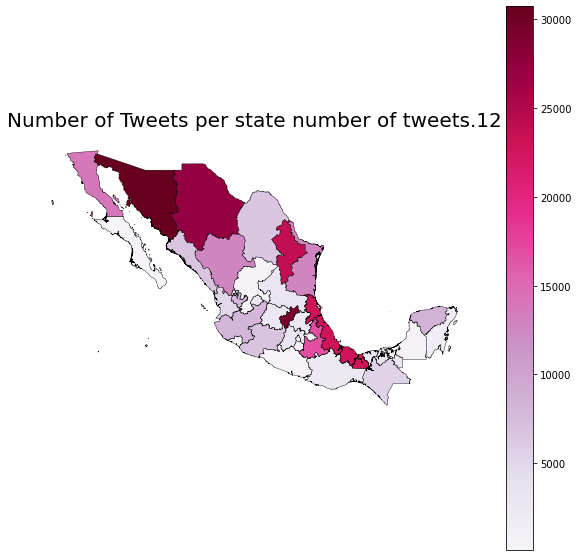

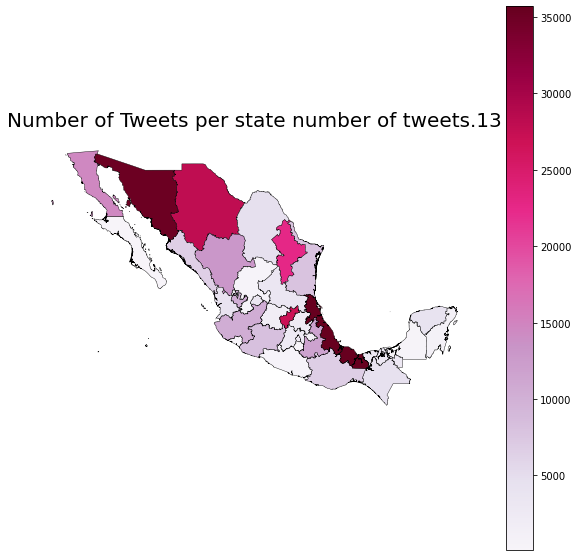

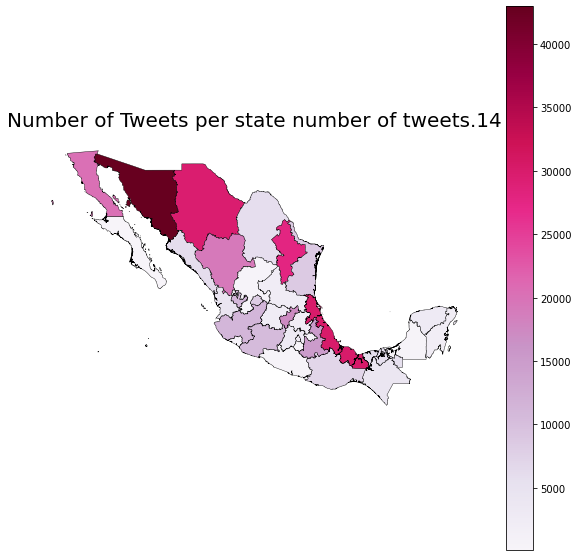

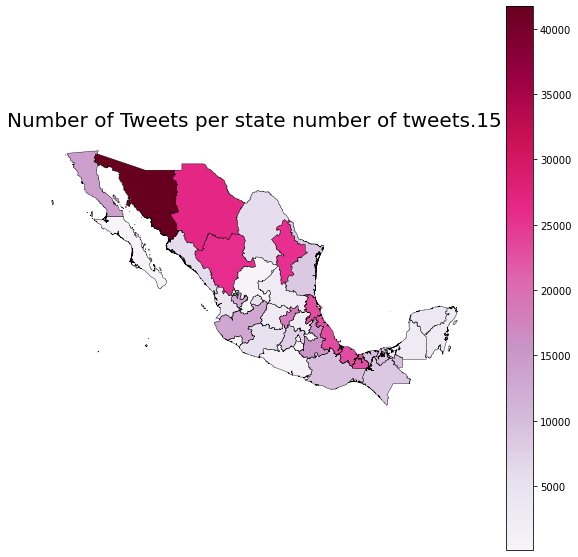

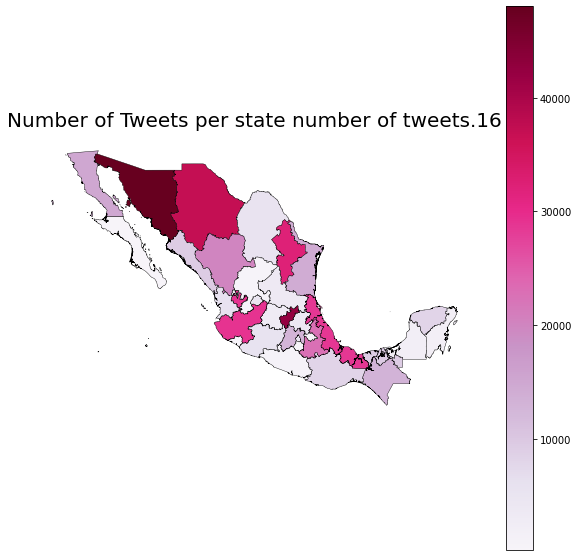

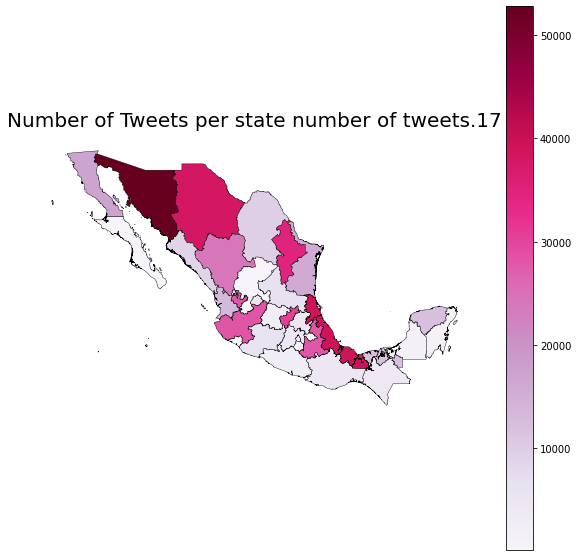

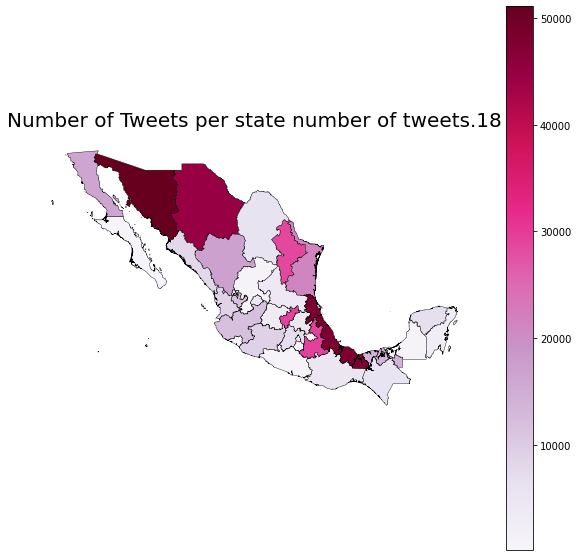

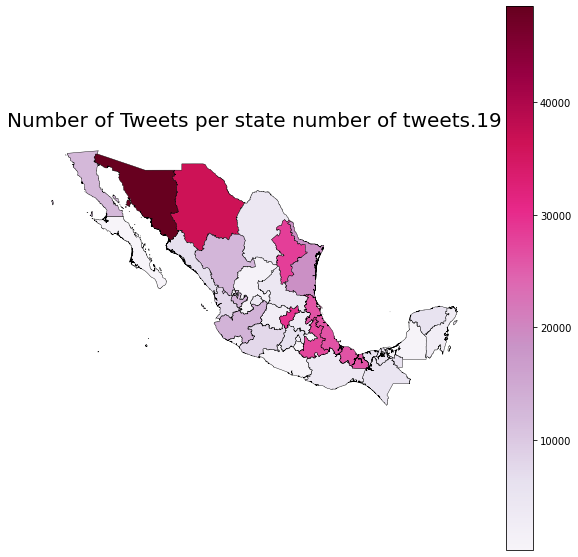

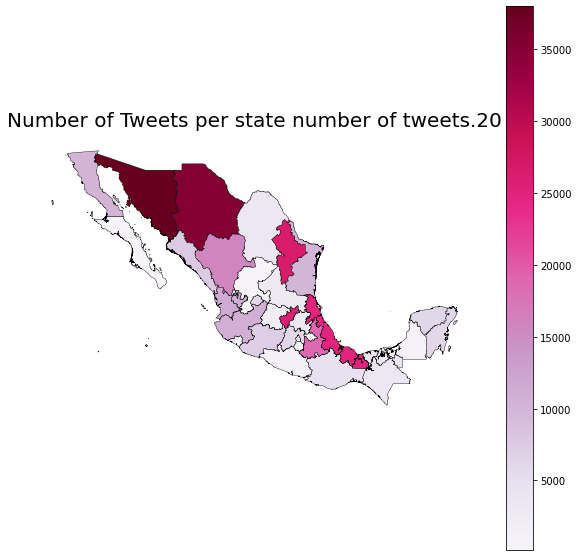

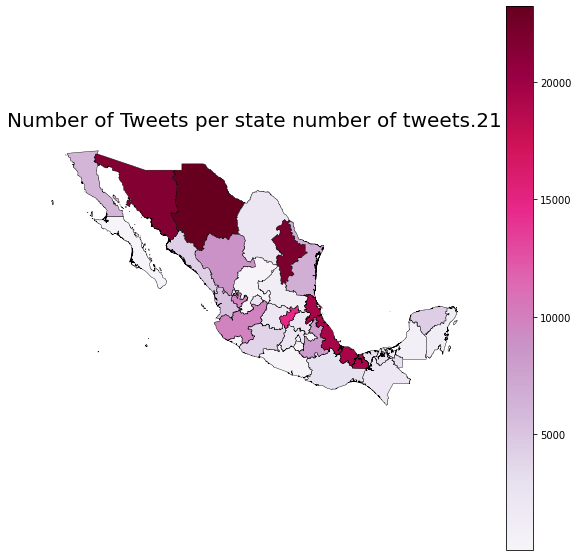

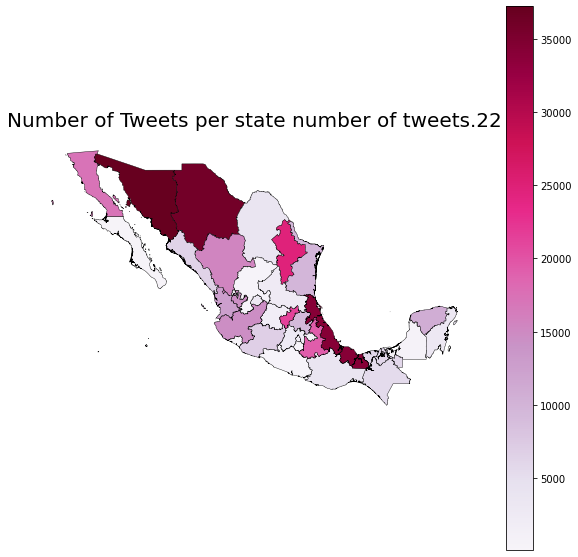

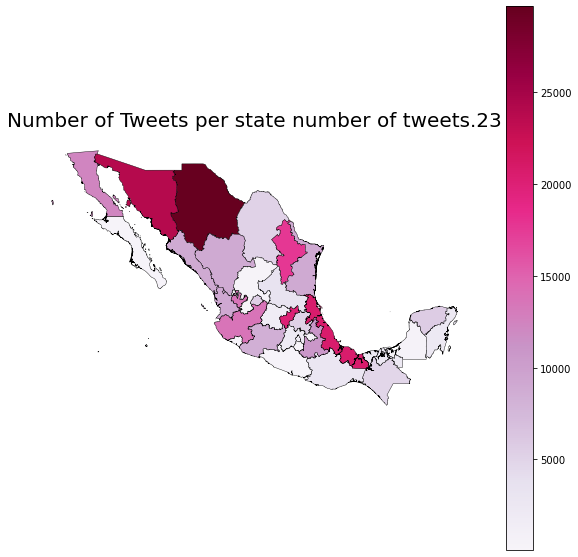

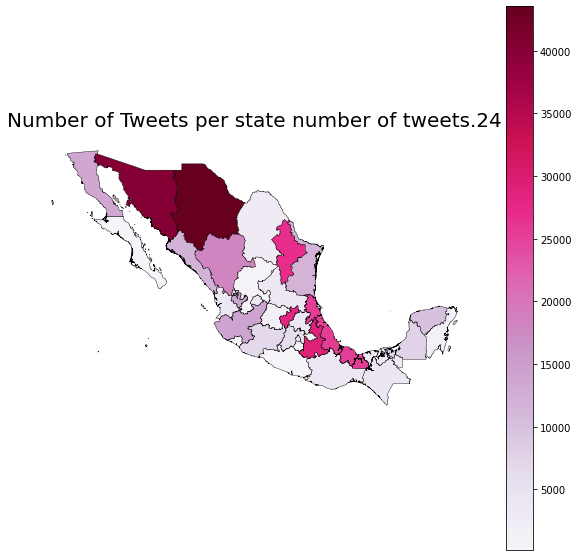

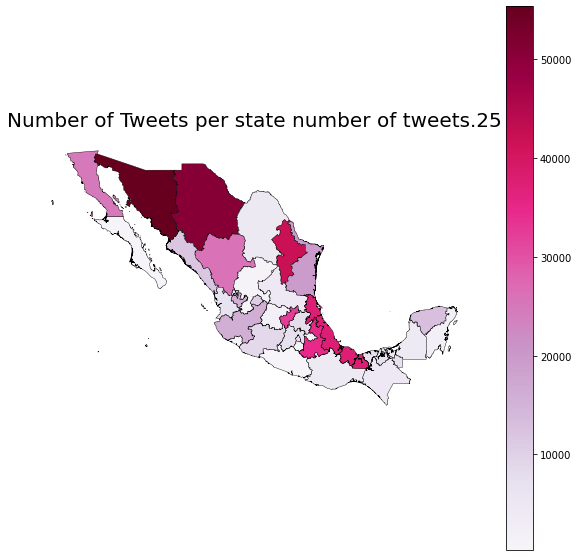

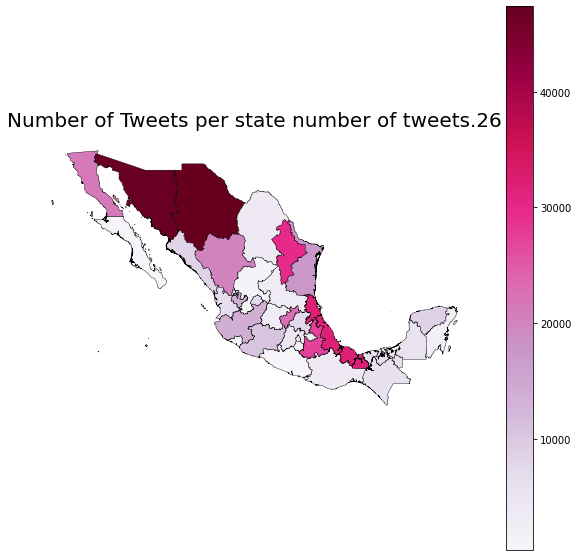

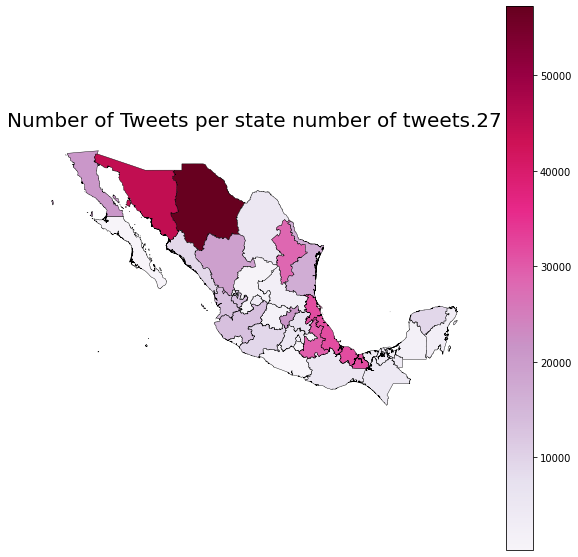

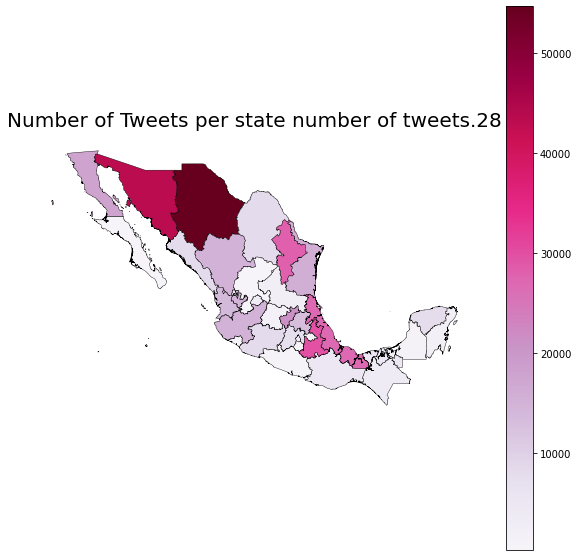

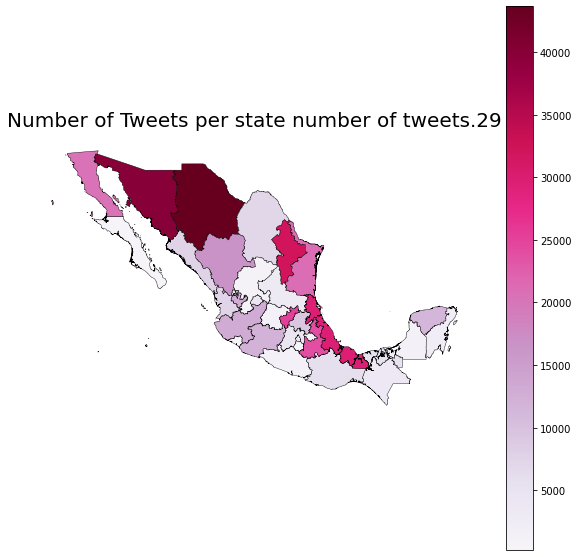

In [463]:
image_frames = []


for dates in final_map.columns.to_list()[2:]:

    # Plot

    ax = final_map.plot(column=dates,
                    cmap='PuRd',
                    figsize=(10, 10),
                    legend=True,
                    edgecolor='black',
                    linewidth=0.4)

    # Add a title to the map
    ax.set_title('Number of Tweets per state ' +
                 dates, fontdict={'fontsize': 20}, pad=12.5)
    
    
    


    # Removing the axes

    ax.set_axis_off()


    img = ax.get_figure()
    
   


    


    f = io.BytesIO()

    img.savefig(f, format='png', bbox_inches='tight')

    f.seek(0)

    image_frames.append(PIL.Image.open(f))
    
    